In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Vasu\Desktop\youtube\Data\YoutubeCommentsDataSet.csv")
df.head()

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [2]:
df.shape

(18408, 2)

In [3]:
df.isnull().sum()

Comment      44
Sentiment     0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

Comment      0
Sentiment    0
dtype: int64

In [6]:
df.drop_duplicates(inplace=True)
df['Sentiment'].value_counts()

Sentiment
positive    11054
neutral      4503
negative     2317
Name: count, dtype: int64

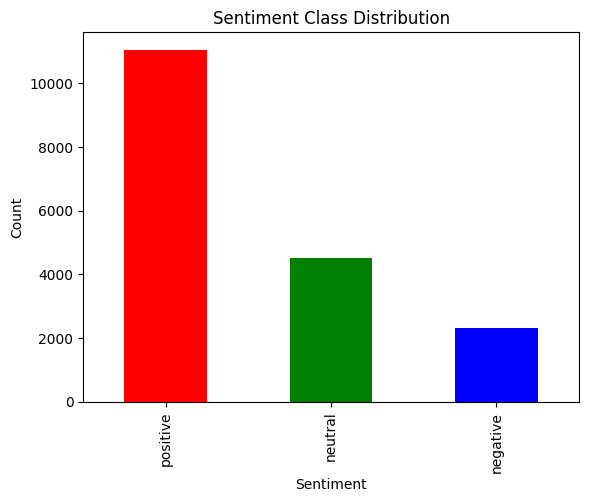

In [7]:
import matplotlib.pyplot as plt

df['Sentiment'].value_counts().plot(kind='bar',color=['red','green','blue'])
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

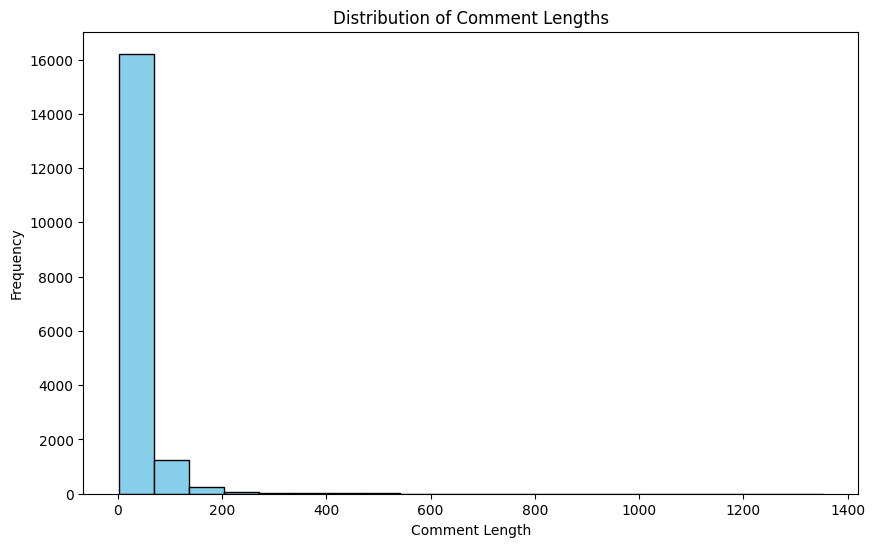

In [8]:
df['text length'] = df['Comment'].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
plt.hist(df['text length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()

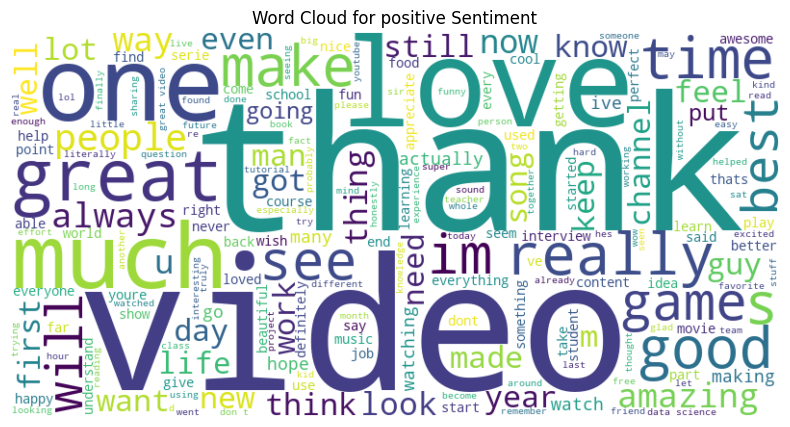

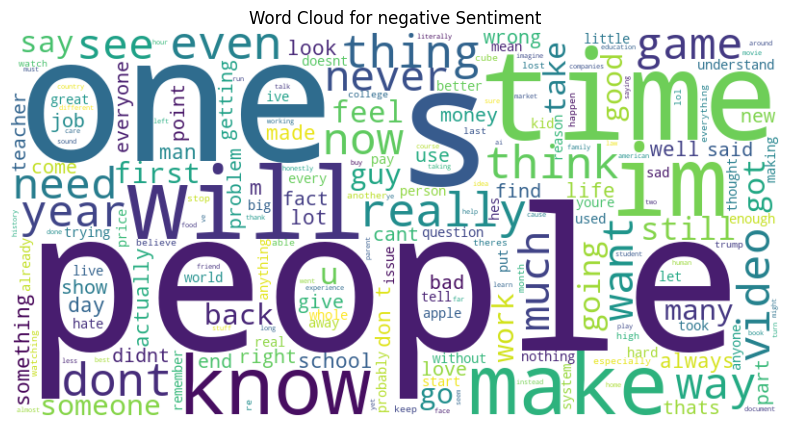

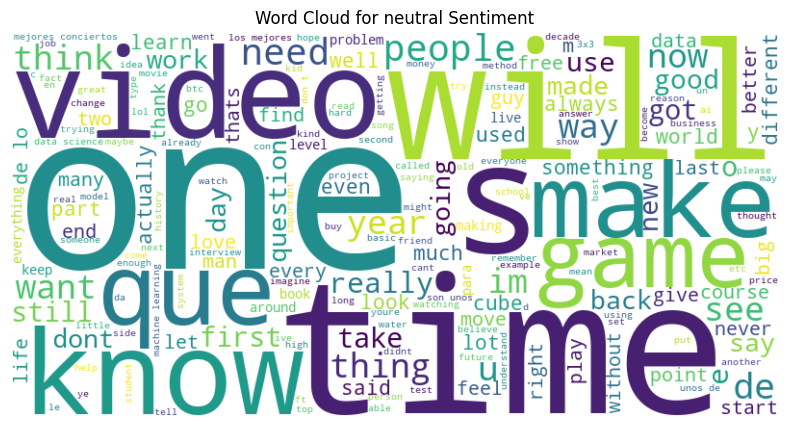

In [ ]:
from wordcloud import WordCloud
def generate_word_cloud(sentiment):
  df['Comment'] = df['Comment'].astype(str)
  text = " ".join(df[df['Sentiment'] == sentiment]['Comment'].astype(str))
  if not text.strip():
    print(f"No text found for sentiment: {sentiment}")
    return

  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(f'Word Cloud for {sentiment} Sentiment')
  plt.show()

generate_word_cloud('positive')
generate_word_cloud('negative')
generate_word_cloud('neutral')

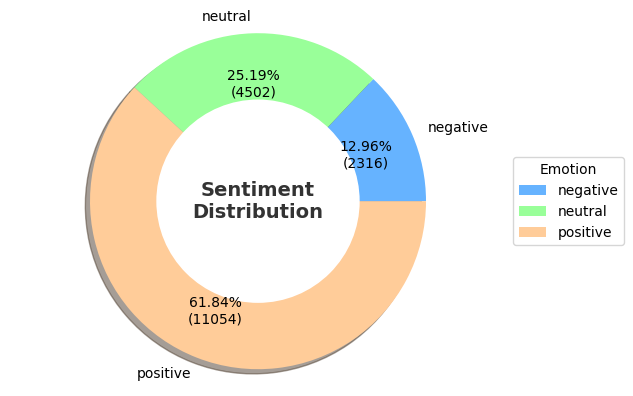

In [10]:
unique_sentiment = df['Sentiment'].unique()

explode = [0] * len(unique_sentiment)

sentiment_counts = df.groupby("Sentiment").size()

colors = ['#66b3ff', '#99ff99', '#ffcc99']

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=sentiment_counts,
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})',
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="black"),
    pctdistance=0.7,
    colors=colors,
    explode=explode,
    shadow=True
)

center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)

ax.text(0, 0, 'Sentiment\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

ax.legend(sentiment_counts.index, title="Emotion", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')

plt.show()
